<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"mohammadaliysz\",\"key\":\"e8f68a5df34c6dc24642db4faf2c79c5\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
from sklearn.preprocessing import StandardScaler
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline
sns.set(color_codes=True)

### import dataset as a data frame

In [ ]:
Bike_demand = pd.read_csv('train.csv')

# About Dataset

### **Description of features**

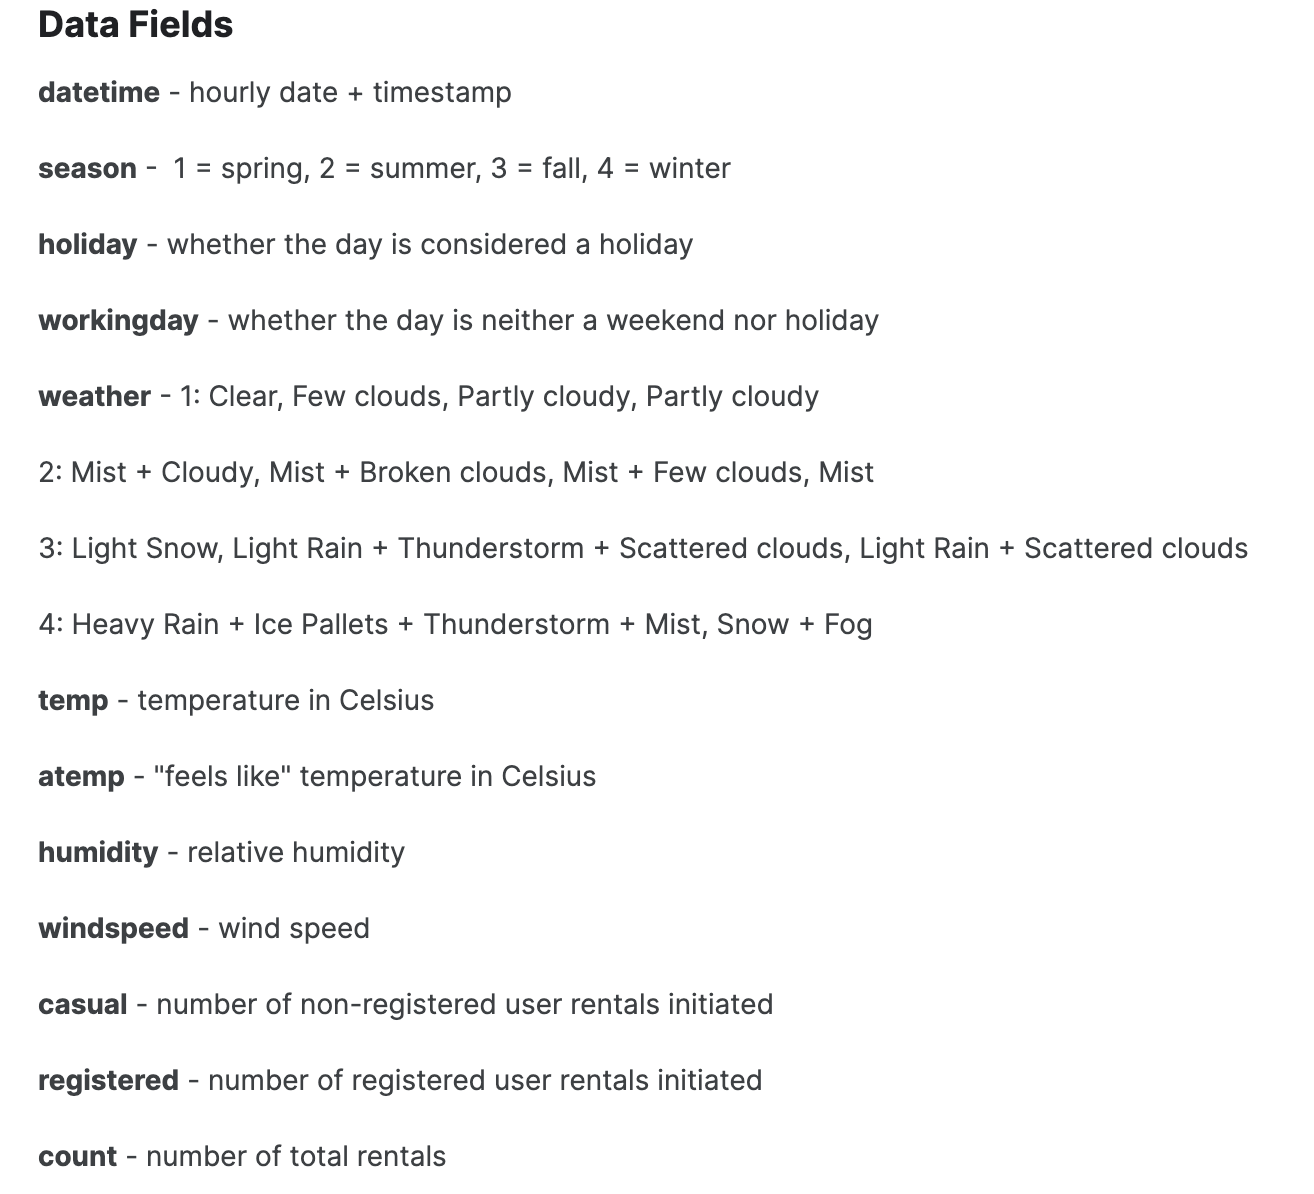

# A quick look at the dataset

In [ ]:
print(Bike_demand.head(7))
print(Bike_demand.shape)

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2  9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000       8          32     40  
2        80     0.0000       5          27     32  
3        75     0.0000       3          10     13  
4        75     0.0000       0           1      1  
5        75     6.0032       0           1      1  
6        80

In [ ]:
Bike_demand.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Data Cleaning

### Fortunately (or unfortunately?!) our dataset did not have **null** , **invalid** or **duplicate** values ​​to mess with.

#### Checking Nulls

In [ ]:
Bike_demand.isnull().sum(axis = 0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
Bike_demand.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Checking **Duplicates**

In [ ]:
Bike_demand[Bike_demand.duplicated()]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


#### Checking for any **invalid** values in columns where they shouldn't exist. For example, **humidity** can not have a negative value.


In [ ]:
negative_check = Bike_demand[['humidity', 'windspeed']].lt(0).sum()
print(negative_check)

humidity     0
windspeed    0
dtype: int64


#### Checking **Outliers**

Analyzing outliers through **IQR-score** for columns where outliers are likely to significantly impact results.


In [ ]:
potential_outlier_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
outliers = {}

# Calculate IQR and determine outliers
for col in potential_outlier_cols:
    Q1 = Bike_demand[col].quantile(0.25)
    Q3 = Bike_demand[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR    # lower bound
    upper_bound = Q3 + 1.5 * IQR    # upper bound
    # Store the number of outliers
    outliers[col] = Bike_demand[(Bike_demand[col] < lower_bound) | (Bike_demand[col] > upper_bound)].shape[0]

outliers

{'temp': 0,
 'atemp': 0,
 'humidity': 22,
 'windspeed': 227,
 'casual': 749,
 'registered': 423,
 'count': 300}

#### Decisions on Outliers
Removing/Imputing?



Since the outlier data found according to the **IQR** method are probably not outlier data and only represent special conditions, we decided not to make any changes in the original data. For example the outliers in windspeed and humidity might be due to extreme weather conditions.



# Data Preprocessing


#### Converting everything to numerical values.

### Working with the **datetime** format is difficult, because all the data have unique values ​​and the exact time is not very important to us. So we extract our desired features from it and convert it to **hour-only** and **week** formats.

In [ ]:
import calendar

In [ ]:
# Ensure the column is in datetime format
Bike_demand['datetime'] = pd.to_datetime(Bike_demand['datetime'])

# Extract the hour as a string (e.g., "00", "01", "02", ...)
Bike_demand['hour'] = Bike_demand['datetime'].dt.strftime('%H')


In [ ]:
# Extract the week number (ISO week numbering)
Bike_demand['week'] = Bike_demand['datetime'].dt.isocalendar().week

#### We replace the datetime column with hour & week.

In [ ]:
Bike_demand = Bike_demand.drop(['datetime'],axis=1) # Drop the whole datetime column


In [ ]:
Bike_demand['hour'] = Bike_demand['hour'].astype(int) # Convert the type of hour values to integer


### Redesign the columns positions

In [ ]:
Bike_demand

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,52
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,52
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,52
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,52
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,51
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,51
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,51
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,51


In [ ]:
from pandas._libs.tslibs.offsets import Second
# Move 'week and 'hour' to the first and second positions

col='week'
first_col = Bike_demand.pop(col)

col_name = 'hour'
second_col = Bike_demand.pop(col_name)


# Insert the column at position 0 and 1
Bike_demand.insert(0, col, first_col)
Bike_demand.insert(1, col_name, second_col)

In [ ]:
Bike_demand

,week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,52,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,52,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,52,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,52,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,52,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,51,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,51,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,51,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,51,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# A closer look at features values

In [ ]:
Bike_demand['temp'].value_counts()


14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

#### Find the **Max**, **Min** and **Mean** of some features.

In [ ]:
print('Max temp=',Bike_demand['temp'].max())
print('Min temp=',Bike_demand['temp'].min())
print('Mean of temp=',Bike_demand['temp'].mean())
print('-------------------\n')

print('Max humidity=',Bike_demand['humidity'].max())
print('Min humidity=',Bike_demand['humidity'].min())
print('Mean humidity=',Bike_demand['humidity'].mean())
print('-------------------\n')

print('Max windspeed=',Bike_demand['windspeed'].max())
print('Min windspeed=',Bike_demand['windspeed'].min())
print('Mean of windspeed=',Bike_demand['windspeed'].mean())


Max temp= 41.0
Min temp= 0.82
Mean of temp= 20.23085981995223
-------------------

Max humidity= 100
Min humidity= 0
Mean humidity= 61.88645967297446
-------------------

Max windspeed= 56.9969
Min windspeed= 0.0
Mean of windspeed= 12.7993954069447


<Axes: title={'center': 'Weather'}>

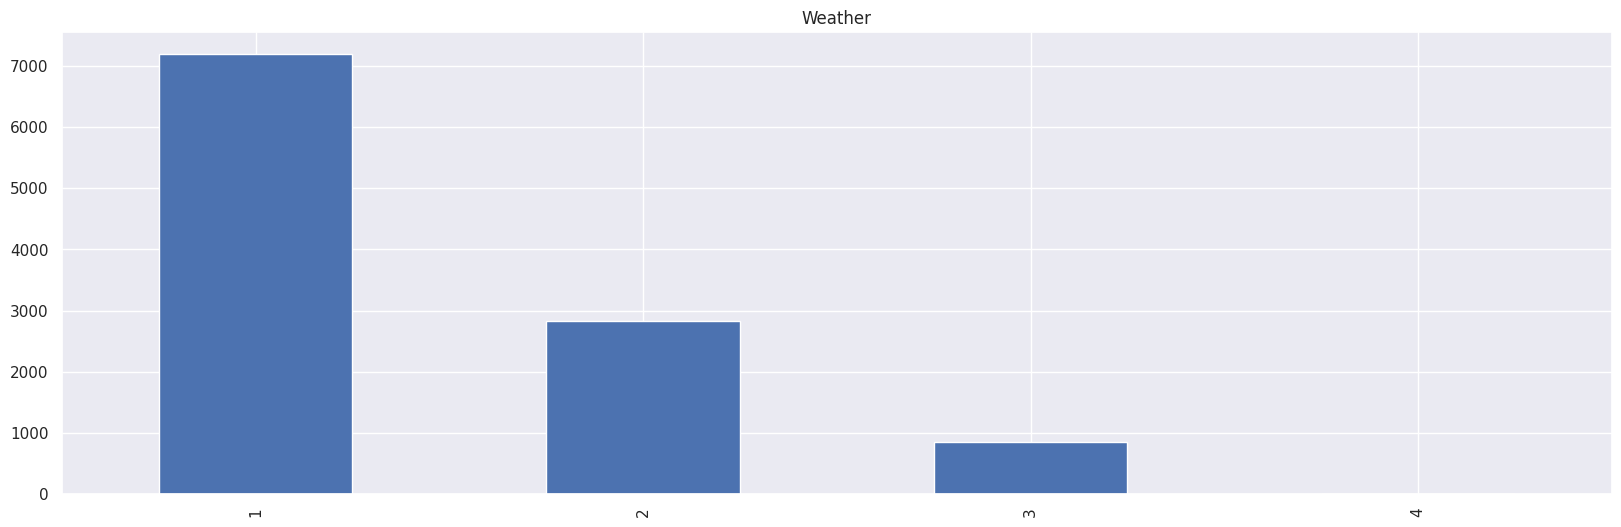

In [ ]:
Bike_demand['weather'].value_counts().plot.bar(figsize=(20, 6),title='Weather')

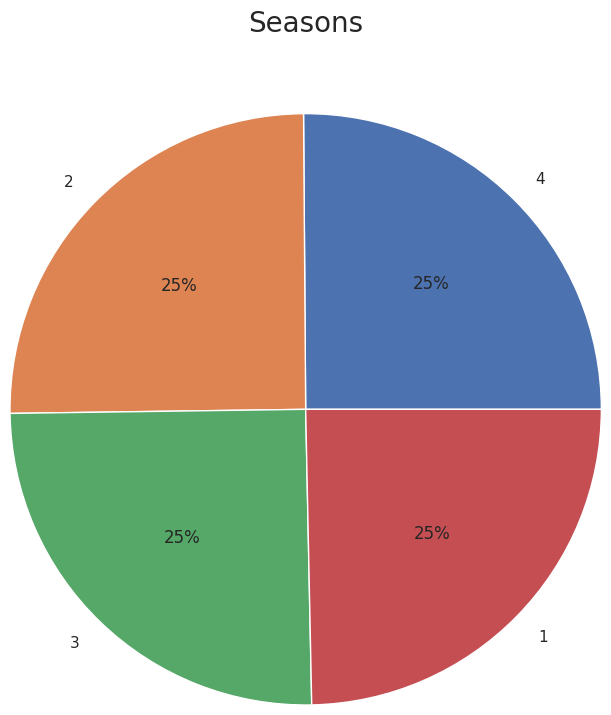

In [ ]:
Bike_demand['season'].value_counts()[0:4].plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Seasons', y=1.5,fontsize=20)
plt.show()

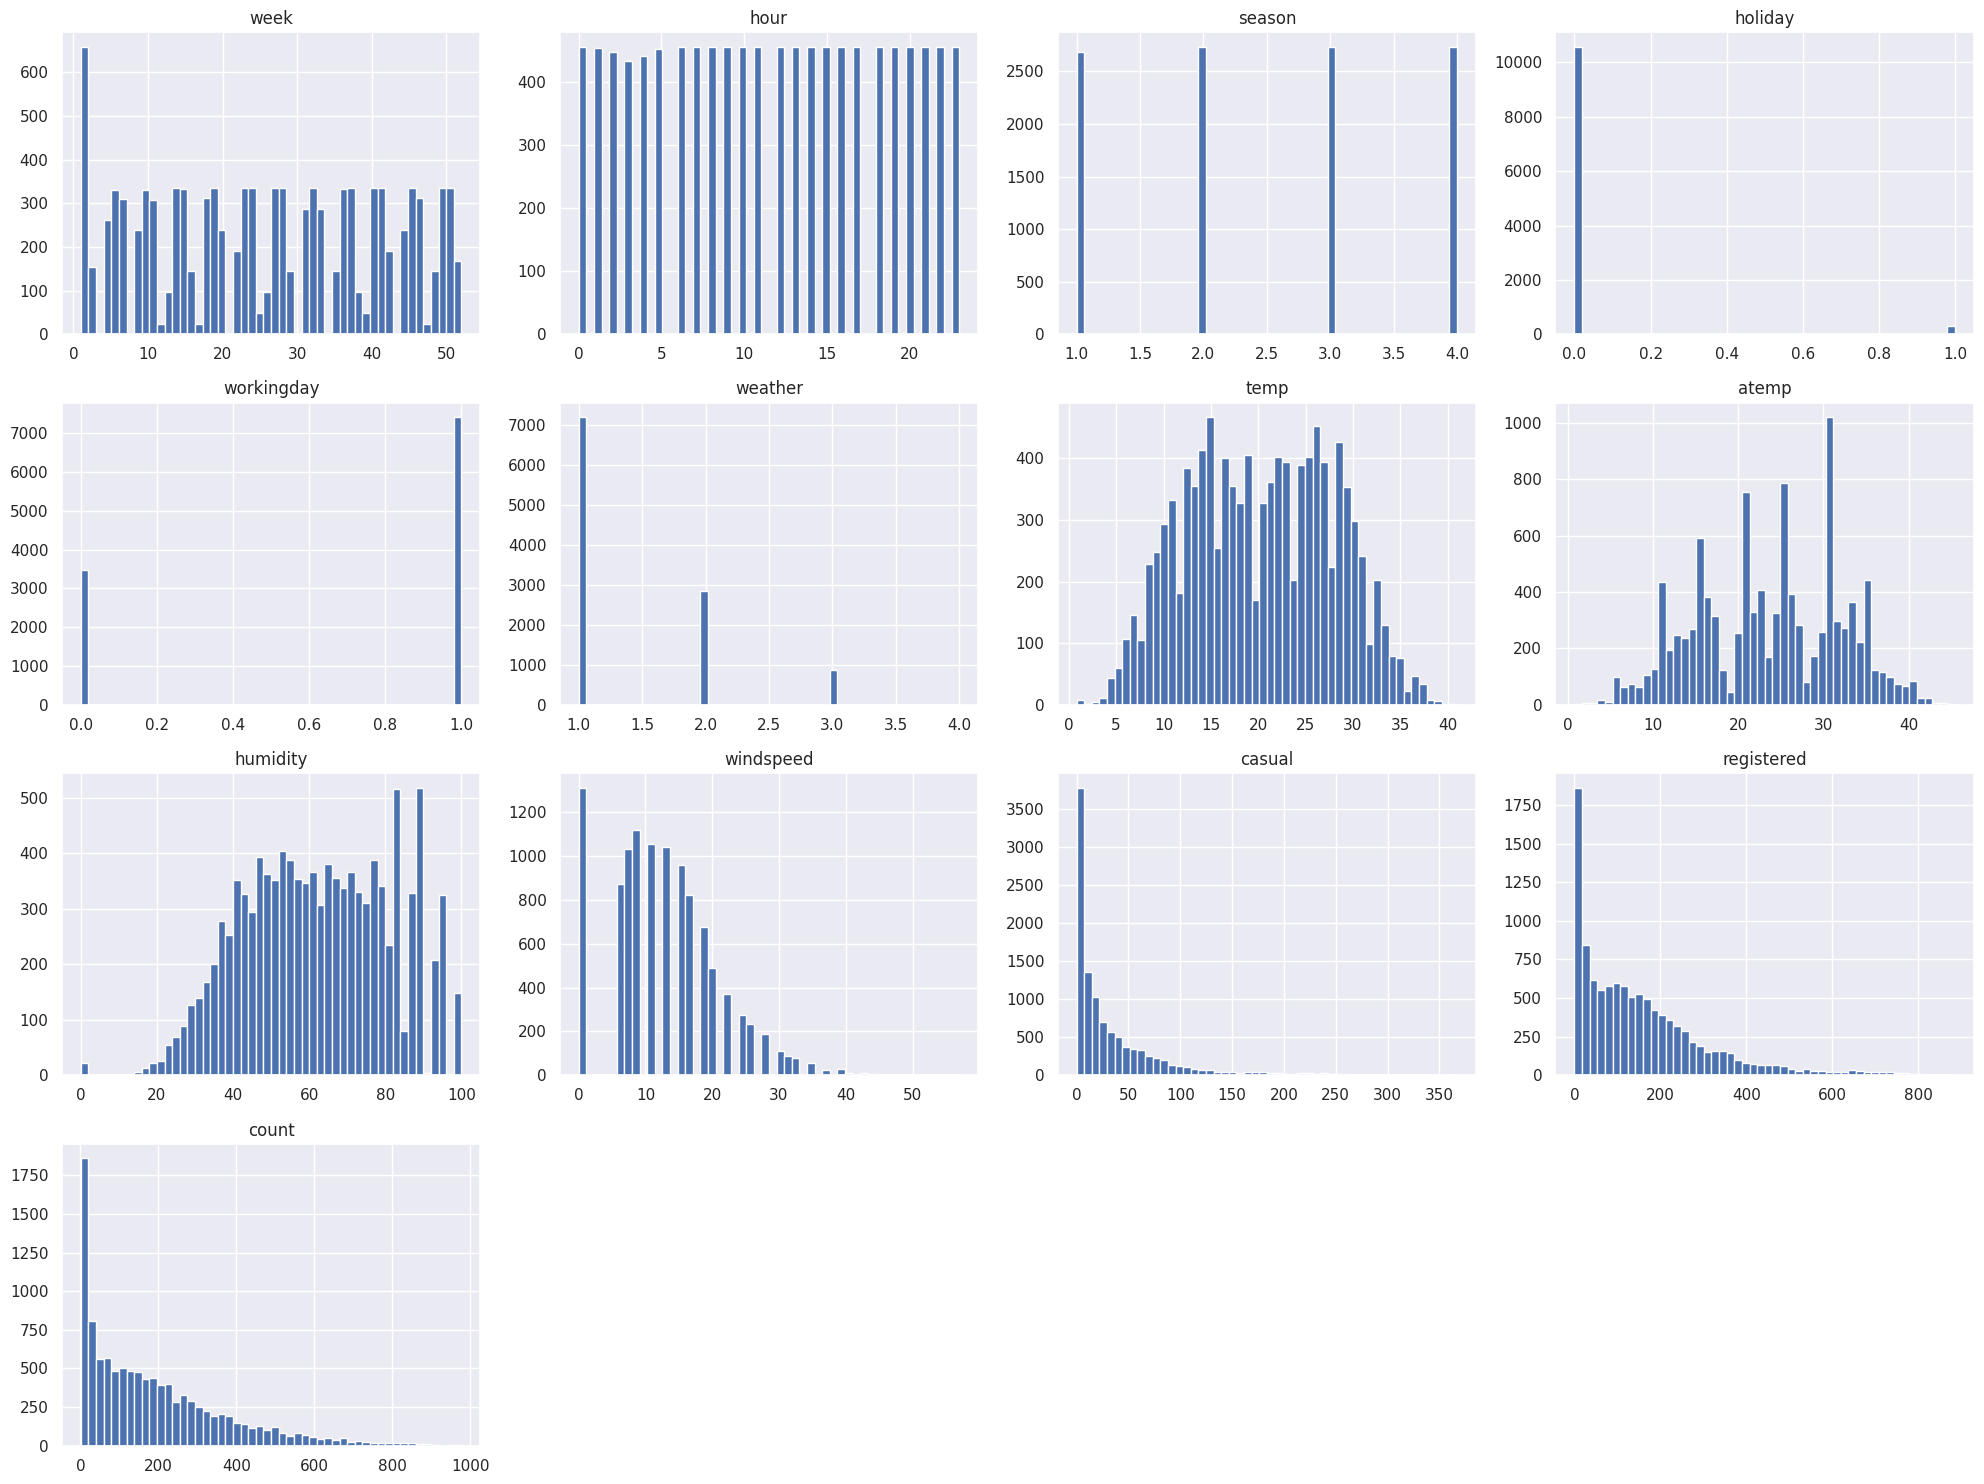

In [ ]:
Bike_demand.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

## Generating a new feature!

In [ ]:
print(Bike_demand['holiday'].value_counts())
print(Bike_demand['workingday'].value_counts())

0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64


In [ ]:
Bike_demand[(Bike_demand['holiday'] == 0) & (Bike_demand['workingday']== 0)]

,week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,52,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,52,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,52,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,52,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,52,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,50,19,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
10810,50,20,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
10811,50,21,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
10812,50,22,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


### If we take a closer look at the **holiday** and **workingday** feature values, we will find that some days are neither holiday days nor working days. which include almost a third of the days of the table (3163 days of 10886 days). Therefore, they should probably be considered weekends. So we add a new column called **weekend** to the dataset.

In [ ]:
Bike_demand['weekend'] = np.where((Bike_demand['holiday'] == 0) & (Bike_demand['workingday'] == 0), 1, 0)


In [ ]:
Bike_demand.head(5)

,week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend
0,52,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,52,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,52,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,52,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,52,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [ ]:
Bike_demand.corr()

,week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend
week,1.000000,-0.006532,0.939284,0.000976,-0.022593,0.019762,0.240794,0.248653,0.216435,-0.145962,0.079906,0.156480,0.152512,0.022839
hour,-0.006532,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.002724
season,0.939284,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.002433
holiday,0.000976,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.109748
workingday,-0.022593,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.934780
weather,0.019762,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.032078
temp,0.240794,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.030873
atemp,0.248653,0.140343,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.023405
humidity,0.216435,-0.278011,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.010463
windspeed,-0.145962,0.146631,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.016816


# Exploratory Data Analysis (EDA) Findings:


### First, we go to the inherently numerical features and try to use mathematical and statistical criteria for them.



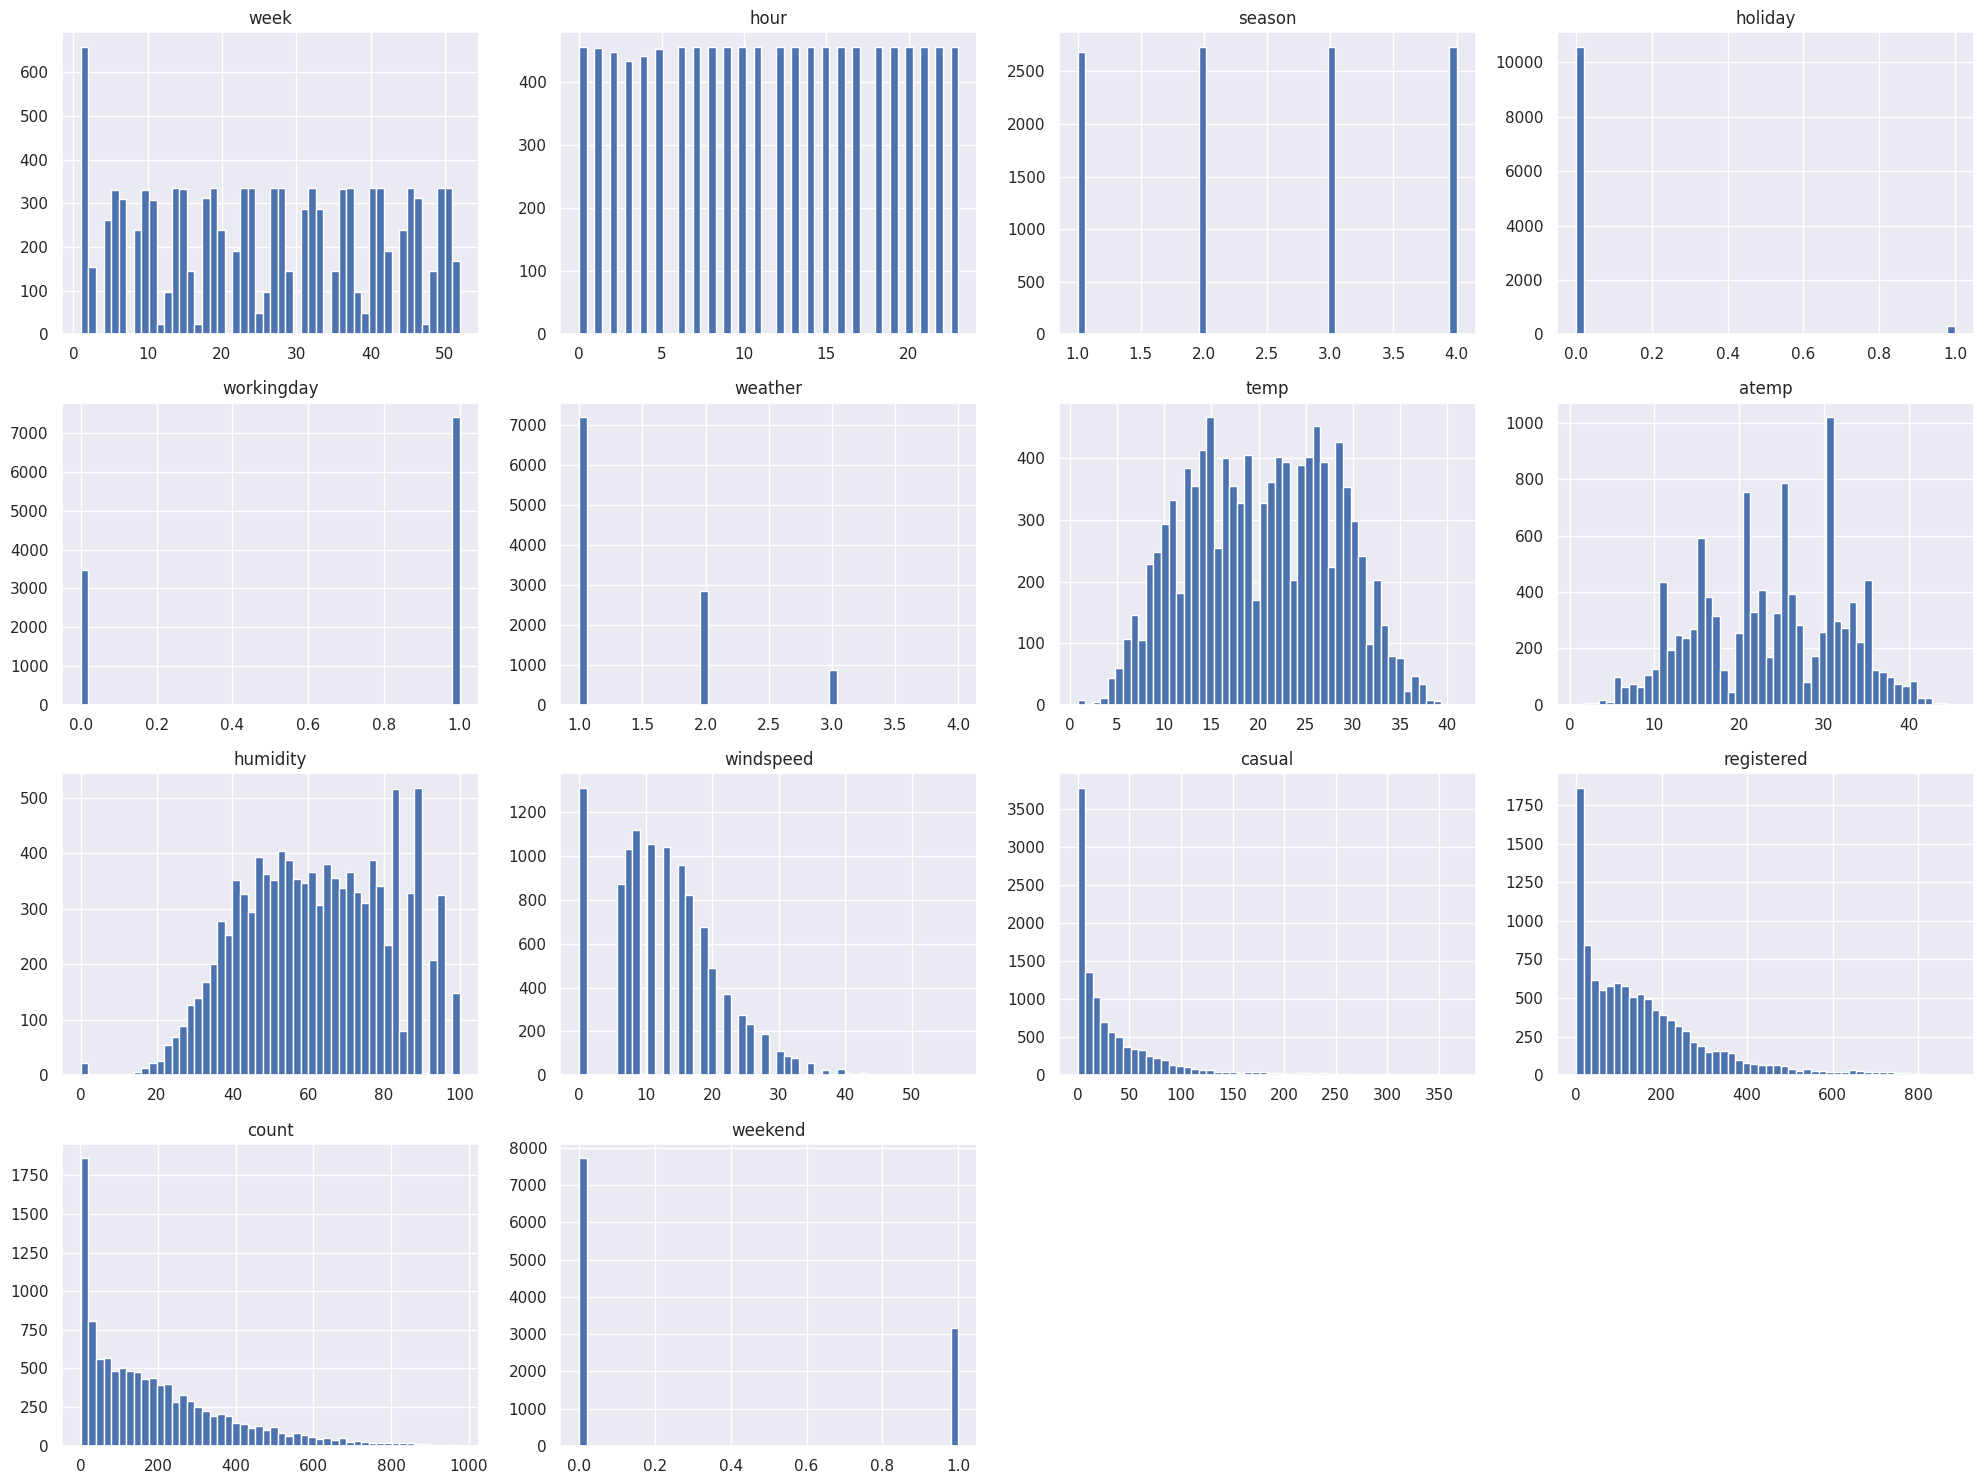

In [ ]:
Bike_demand.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [ ]:
correlation = Bike_demand.corr()
correlation.style.background_gradient(cmap='coolwarm')

,week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend
week,1.000000,-0.006532,0.939284,0.000976,-0.022593,0.019762,0.240794,0.248653,0.216435,-0.145962,0.079906,0.156480,0.152512,0.022839
hour,-0.006532,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.002724
season,0.939284,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.002433
holiday,0.000976,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.109748
workingday,-0.022593,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.934780
weather,0.019762,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.032078
temp,0.240794,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.030873
atemp,0.248653,0.140343,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.023405
humidity,0.216435,-0.278011,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.010463
windspeed,-0.145962,0.146631,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.016816


 ## Summary Statistics:
The summary statistics provide us with significant insights into the range, central tendency, and dispersion of the data.
For instance, temp and atemp both have a minimum close to 0, indicating that there are very cold days included in the dataset. In contrast, they have a maximum of 41 and 45.45, respectively, indicating some extremely hot days.
The humidity ranges from 0 to 100, as expected for percentage values. A minimum value of 0 might indicate an extremely dry period.
Windspeed has a maximum value of around 57, which is quite high and could be considered extreme weather conditions.
 ## Data Distribution:
The histograms show the distributions of variables. For example, humidity seems fairly normally distributed, whereas windspeed is right-skewed, indicating that most of the time, the wind speed is low to moderate, with occasional high wind speeds.
The target variable count is also right-skewed, meaning there are usually fewer rentals, with occasional periods of high demand.


## Categorical Analysis
After statistical analysis on numerical features we try to do the same procedure for pseudo-categorical features.




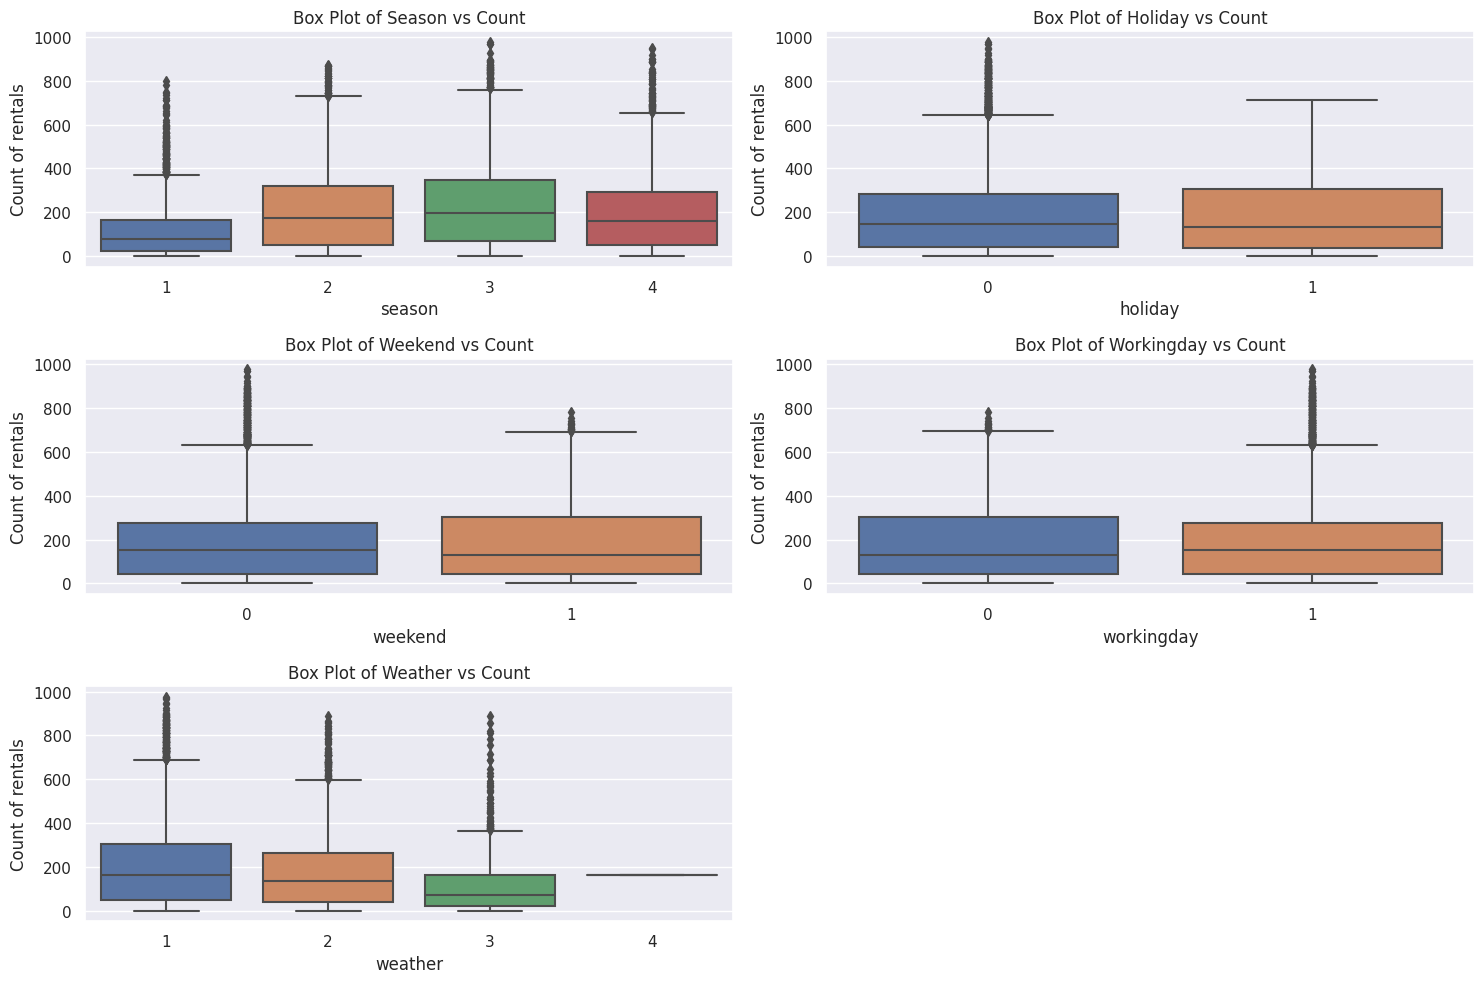

{'season': season
 1    116.343261
 2    215.251372
 3    234.417124
 4    198.988296
 Name: count, dtype: float64,
 'holiday': holiday
 0    191.741655
 1    185.877814
 Name: count, dtype: float64,
 'weekend': weekend
 0    192.724589
 1    188.765096
 Name: count, dtype: float64,
 'workingday': workingday
 0    188.506621
 1    193.011873
 Name: count, dtype: float64,
 'weather': weather
 1    205.236791
 2    178.955540
 3    118.846333
 4    164.000000
 Name: count, dtype: float64}

In [ ]:
# Categorical variables to explore
categorical_features = ['season', 'holiday', 'weekend' ,'workingday', 'weather']

# Box plots for categorical variables vs count
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=feature, y='count', data=Bike_demand)
    plt.ylabel('Count of rentals')
    plt.title(f'Box Plot of {feature.capitalize()} vs Count')

plt.tight_layout()
plt.show()

# Calculating mean rental counts for each category to understand their impact
mean_rentals = {feature: Bike_demand.groupby(feature)['count'].mean() for feature in categorical_features}
mean_rentals


### Categorical Analysis Findings:


**1. Season:**
Rentals are lowest during season 1 (spring) and highest during seasons 2 (summer) and 3 (fall), indicating that the weather is likely a significant factor influencing the decision to rent a bike. This pattern makes sense as more people are likely to ride bikes during milder weather.

**2. Holiday:**
Surprisingly, there's not a significant difference in the number of rentals between holidays and non-holidays. This could indicate that the demand for rentals is not strongly affected by holidays, possibly because the service is used for both commuting and leisure.

**3. Working day:**
Similar to holidays, there doesn't appear to be a significant difference in rentals on working days versus non-working days. This suggests that the bikes could be used not only for commuting on working days but also for leisure activities on non-working days.

**4. Weekend:**
Similar to other days, there is no noticeable difference in the rental of bicycles between holidays and workingdays on weekends, and this strengthens the thesis that bicycles are not only used for recreation.

**5. Weather:**
As expected, the weather has a considerable effect on rentals. Good weather (category 1) has the highest number of rentals, while poor weather (categories 3 and 4) has significantly fewer rentals. This trend is logical since adverse weather conditions are likely to discourage bike rentals.

# Normalization/Standardization of Data

In [ ]:
# Before scaling, we need to separate out the target variable 'count' as it should not be scaled with the features.
X_features = Bike_demand.drop(['count'], axis=1)
y_target = Bike_demand['count']

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_scaled = scaler.fit_transform(X_features)

# Convert scaled features into DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)

print(X_scaled_df.head(4))
print(X_scaled_df.tail(4))

       week      hour    season  holiday  workingday   weather      temp  \
0  1.736895 -1.668944 -1.349864 -0.17149   -1.460672 -0.660178 -1.333661   
1  1.736895 -1.524341 -1.349864 -0.17149   -1.460672 -0.660178 -1.438907   
2  1.736895 -1.379739 -1.349864 -0.17149   -1.460672 -0.660178 -1.438907   
3  1.736895 -1.235137 -1.349864 -0.17149   -1.460672 -0.660178 -1.333661   

      atemp  humidity  windspeed    casual  registered   weekend  
0 -1.092737  0.993213  -1.567754 -0.660992   -0.943854  1.562584  
1 -1.182421  0.941249  -1.567754 -0.560908   -0.818052  1.562584  
2 -1.182421  0.941249  -1.567754 -0.620958   -0.851158  1.562584  
3 -1.092737  0.681430  -1.567754 -0.660992   -0.963717  1.562584  
           week      hour    season  holiday  workingday   weather      temp  \
10882  1.670302  1.223102  1.338012 -0.17149    0.684616 -0.660178 -0.702182   
10883  1.670302  1.367704  1.338012 -0.17149    0.684616 -0.660178 -0.807428   
10884  1.670302  1.512307  1.338012 -0.17149

#### **Feature Scaling:** All features, except for the target variable 'count', have been standardized (mean = 0 and variance = 1). This normalization ensures that each feature contributes appropriately to the model's learning process, particularly for models sensitive to input scale.

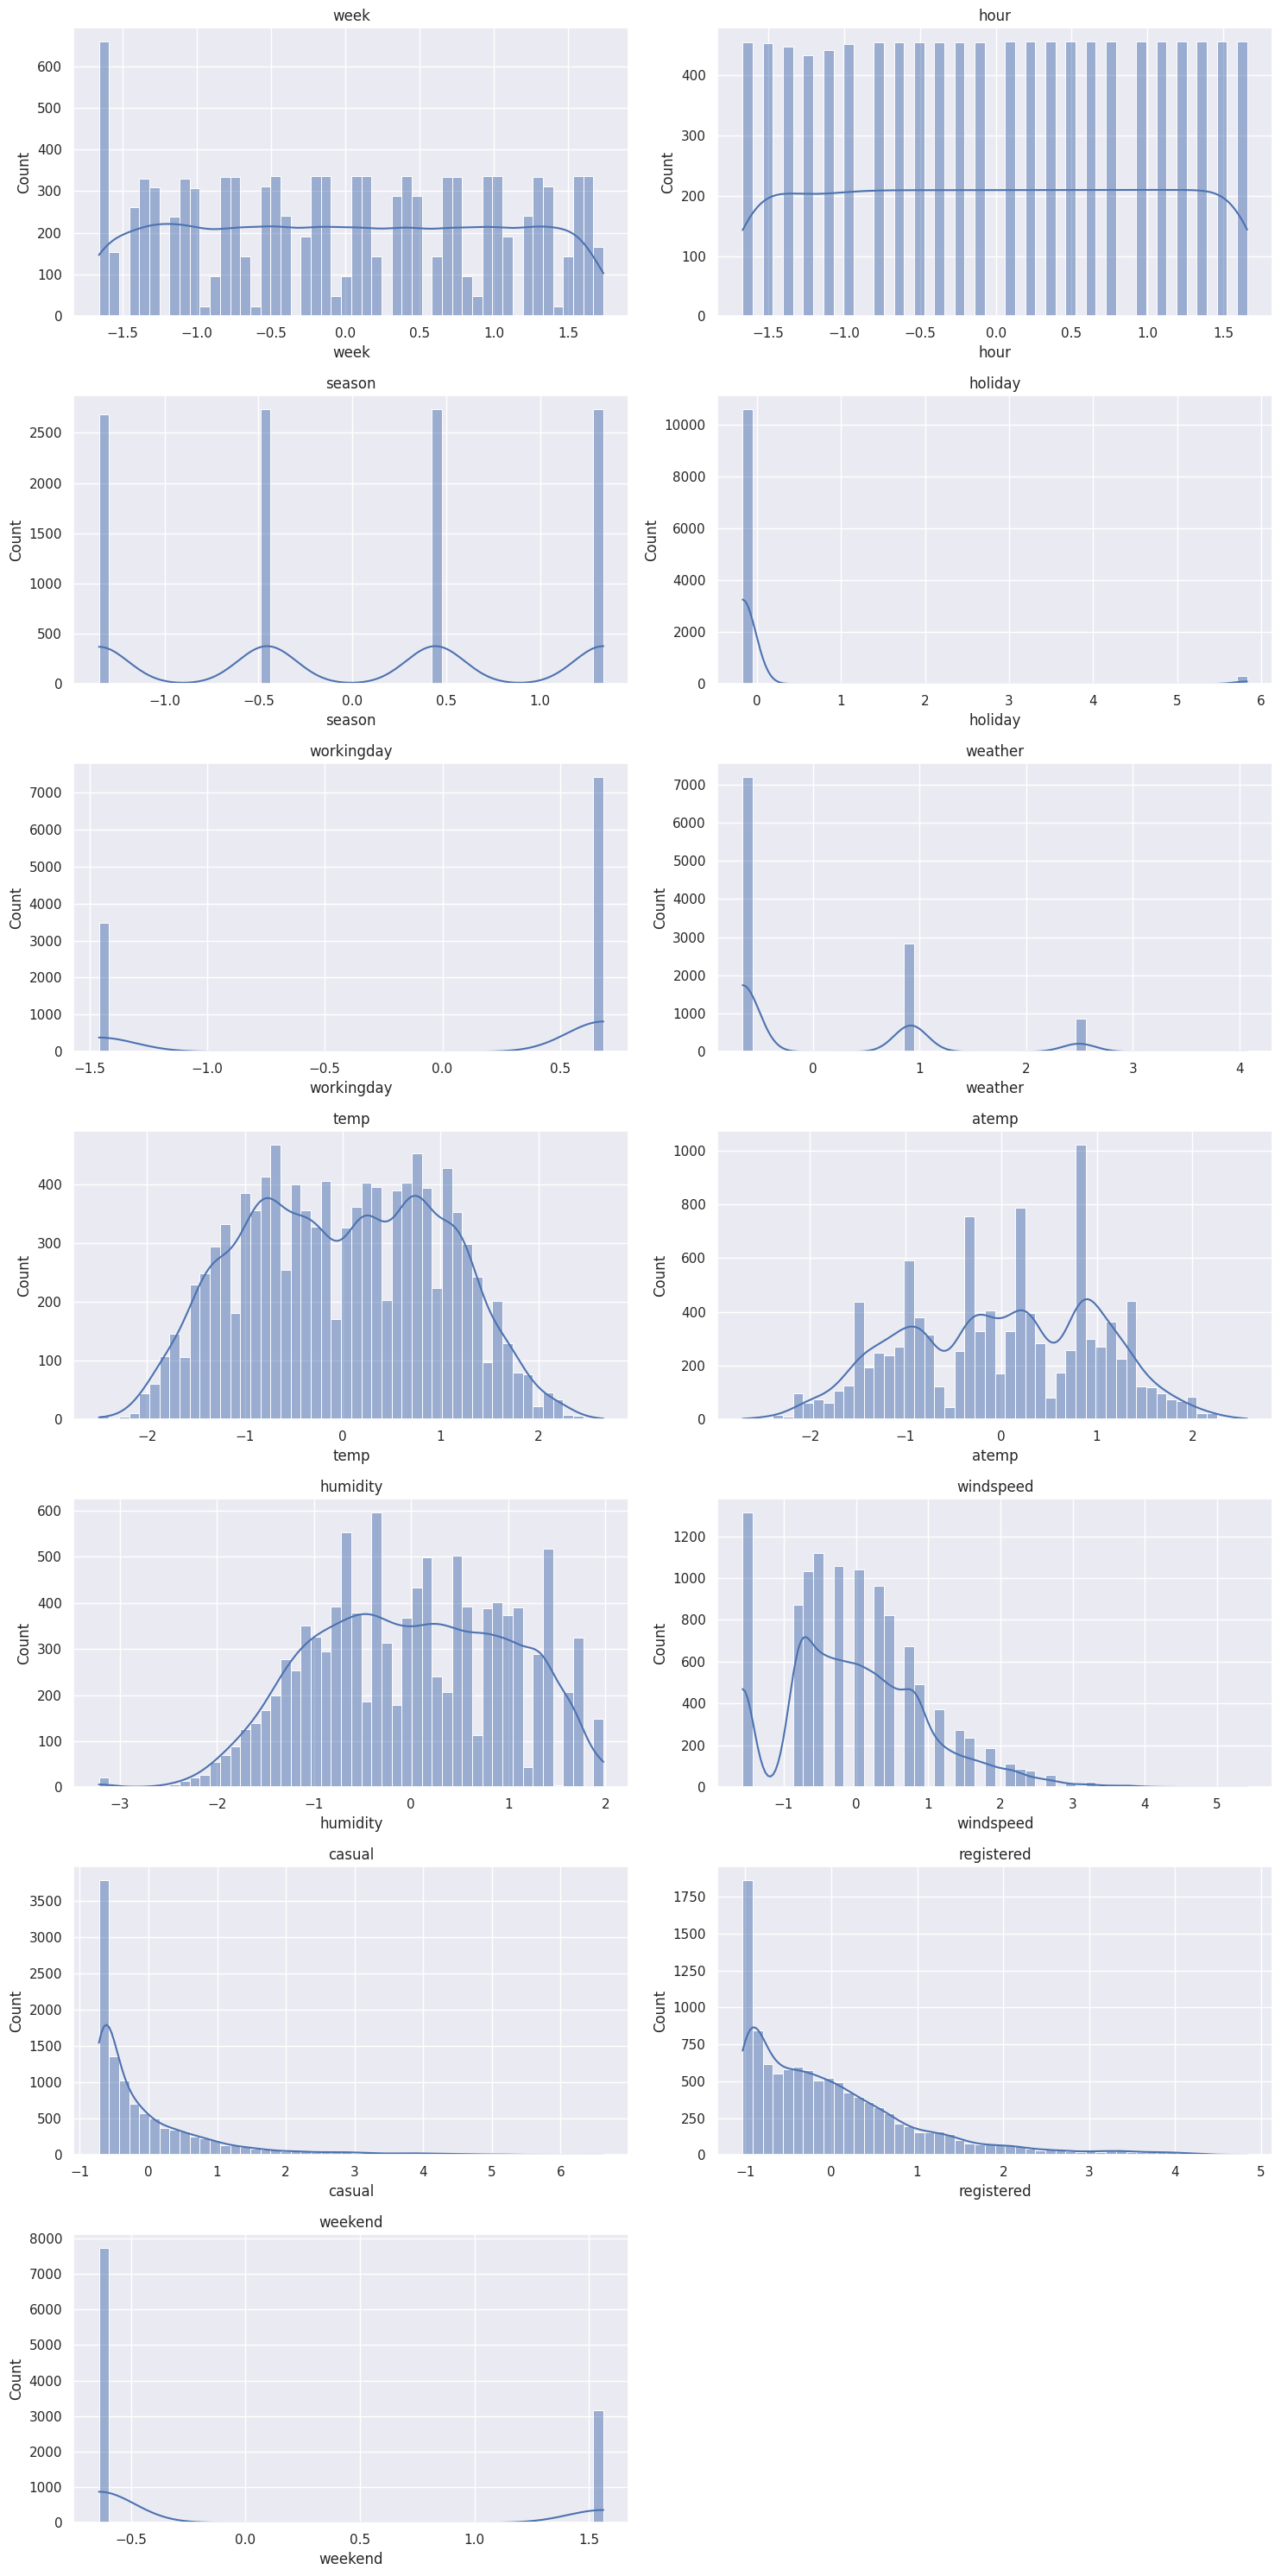

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the number of columns for your DataFrame
num_cols = len(X_scaled_df.columns)

# Calculate the number of rows needed in the subplot grid
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1  # Add an extra row if the number of columns is odd

plt.figure(figsize=(15, 30))

# Create a histogram with a KDE for each column in the DataFrame
for i, col in enumerate(X_scaled_df.columns, 1):
    plt.subplot(num_rows, 2, i)  # Set the current subplot position (in a 2-column layout)
    sns.histplot(X_scaled_df[col], bins=50, kde=True)  # Plot histogram with KDE
    plt.title(col)  # Set title to the column name

plt.tight_layout()  # Ensure plots do not overlap
plt.show()
